<a href="https://colab.research.google.com/github/Jun-Liu-291/10-Animals/blob/master/Animals_10_v6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
%cd /content/drive/My Drive/dataset/tenAnimals_big_no_shuffle

!pwd

/content/drive/My Drive/dataset/tenAnimals_big_no_shuffle
/content/drive/My Drive/dataset/tenAnimals_big_no_shuffle


In [ ]:
from keras.models import load_model

model = load_model('/content/drive/My Drive/dataset/tenAnimals_no_shuffle/10_Animals_ns.h5')

Using TensorFlow backend.


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
leaky_re_lu_15 (LeakyReLU)   (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 128, 128, 32)      9248      
_________________________________________________________________
leaky_re_lu_16 (LeakyReLU)   (None, 128, 128, 32)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 64, 64, 64)       

In [ ]:
TRAIN_PATH = 'train'
VAL_PATH = 'validation'
TEST_PATH = 'test'

batch_size = 128
epochs = 50
IMG_HEIGHT = 128
IMG_WIDTH = 128

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=128,
    class_mode='categorical'
)

Using TensorFlow backend.


Found 2613 images belonging to 10 classes.


In [ ]:
model.evaluate_generator(test_generator)

[1.0443053245544434, 0.6984308958053589]

In [ ]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(learning_rate = 5e-5),
              metrics=['acc'])

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
# change callback function
# apply ReduceLRonPlateau for changing LR
reduceLR = ReduceLROnPlateau(
    monitor="loss",
    factor = 0.5,
    patience = 5,
    verbose = 1,
    mode = 'min',
    min_lr = 1e-6)

# save whole model when get a better val accuracy
checkpoint = ModelCheckpoint(
    filepath = '10_Animals_bns_f1.{epoch:02d}-{val_loss:.2f}.h5',
    monitor='val_acc',
    save_weights_only = False,
    save_best_only = True
)

my_callbacks = [reduceLR, checkpoint]

In [ ]:
train_image_generator = ImageDataGenerator(
    rescale = 1./ 255,
    rotation_range = 45,
    width_shift_range = .25,
    height_shift_range = .25,
    horizontal_flip = True,
    shear_range=0.2,
    zoom_range = 0.2,
    fill_mode='nearest'
)

validation_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(
    batch_size = batch_size,
    directory = TRAIN_PATH,
    shuffle = True,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    class_mode = 'categorical'
)

validation_data_gen = validation_image_generator.flow_from_directory(
    batch_size = batch_size,
    directory = VAL_PATH,
    shuffle = True,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    class_mode = 'categorical'
)

Found 20968 images belonging to 10 classes.
Found 2613 images belonging to 10 classes.


In [ ]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(20968/batch_size),
    epochs=epochs,
    validation_data=validation_data_gen,
    validation_steps=int(2613/batch_size),
    callbacks = my_callbacks
)

Epoch 1/50
163/163 [==============================] - 187s 1s/step - loss: 0.1263 - acc: 0.9521 - val_loss: 0.1409 - val_acc: 0.9518
Epoch 2/50
163/163 [==============================] - 187s 1s/step - loss: 0.1204 - acc: 0.9539 - val_loss: 0.1732 - val_acc: 0.9453
Epoch 3/50
163/163 [==============================] - 189s 1s/step - loss: 0.1187 - acc: 0.9538 - val_loss: 0.1077 - val_acc: 0.9585
Epoch 4/50
163/163 [==============================] - 189s 1s/step - loss: 0.1137 - acc: 0.9566 - val_loss: 0.1307 - val_acc: 0.9510
Epoch 5/50
163/163 [==============================] - 188s 1s/step - loss: 0.1131 - acc: 0.9567 - val_loss: 0.1130 - val_acc: 0.9543
Epoch 6/50
163/163 [==============================] - 189s 1s/step - loss: 0.1092 - acc: 0.9588 - val_loss: 0.1561 - val_acc: 0.9485
Epoch 7/50
163/163 [==============================] - 187s 1s/step - loss: 0.1073 - acc: 0.9591 - val_loss: 0.1251 - val_acc: 0.9544
Epoch 8/50
163/163 [==============================] - 187s 1s/step - 

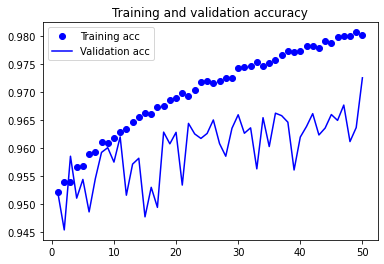

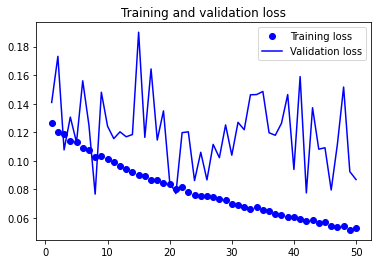

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1) 
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
model.evaluate_generator(test_generator)

[0.06508659571409225, 0.9724836945533752]

In [ ]:
from keras.models import load_model

model = load_model('10Ani_big_ns.h5')

In [ ]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(20968/batch_size),
    epochs=epochs,
    validation_data=validation_data_gen,
    validation_steps=int(2613/batch_size),
    callbacks = my_callbacks
)

Epoch 1/50
163/163 [==============================] - 140s 860ms/step - loss: 0.0520 - acc: 0.9806 - val_loss: 0.0996 - val_acc: 0.9666
Epoch 2/50
163/163 [==============================] - 142s 870ms/step - loss: 0.0506 - acc: 0.9815 - val_loss: 0.0984 - val_acc: 0.9660
Epoch 3/50
163/163 [==============================] - 140s 859ms/step - loss: 0.0497 - acc: 0.9817 - val_loss: 0.0900 - val_acc: 0.9668
Epoch 4/50
163/163 [==============================] - 141s 865ms/step - loss: 0.0513 - acc: 0.9809 - val_loss: 0.1261 - val_acc: 0.9677
Epoch 5/50
163/163 [==============================] - 142s 870ms/step - loss: 0.0464 - acc: 0.9825 - val_loss: 0.0936 - val_acc: 0.9710
Epoch 6/50
163/163 [==============================] - 142s 872ms/step - loss: 0.0486 - acc: 0.9821 - val_loss: 0.1086 - val_acc: 0.9680
Epoch 7/50
163/163 [==============================] - 141s 866ms/step - loss: 0.0483 - acc: 0.9819 - val_loss: 0.0765 - val_acc: 0.9691
Epoch 8/50
163/163 [============================

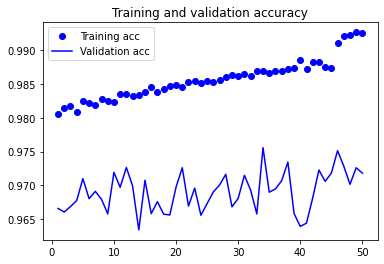

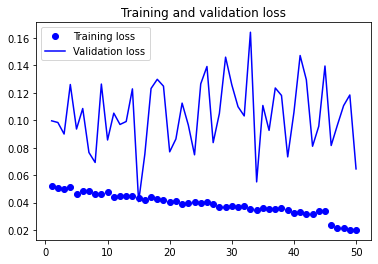

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1) 
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(20968/batch_size),
    epochs=epochs,
    validation_data=validation_data_gen,
    validation_steps=int(2613/batch_size),
    callbacks = my_callbacks
)

Epoch 1/50
163/163 [==============================] - 143s 879ms/step - loss: 0.0212 - acc: 0.9921 - val_loss: 0.1080 - val_acc: 0.9715
Epoch 2/50
163/163 [==============================] - 145s 890ms/step - loss: 0.0202 - acc: 0.9925 - val_loss: 0.1219 - val_acc: 0.9719
Epoch 3/50
163/163 [==============================] - 144s 882ms/step - loss: 0.0200 - acc: 0.9926 - val_loss: 0.1124 - val_acc: 0.9723
Epoch 4/50
163/163 [==============================] - 145s 887ms/step - loss: 0.0201 - acc: 0.9927 - val_loss: 0.0967 - val_acc: 0.9703
Epoch 5/50
163/163 [==============================] - 142s 874ms/step - loss: 0.0188 - acc: 0.9932 - val_loss: 0.1100 - val_acc: 0.9662
Epoch 6/50
163/163 [==============================] - 143s 875ms/step - loss: 0.0190 - acc: 0.9931 - val_loss: 0.1457 - val_acc: 0.9692
Epoch 7/50
163/163 [==============================] - 140s 860ms/step - loss: 0.0185 - acc: 0.9932 - val_loss: 0.1092 - val_acc: 0.9709
Epoch 8/50
163/163 [============================

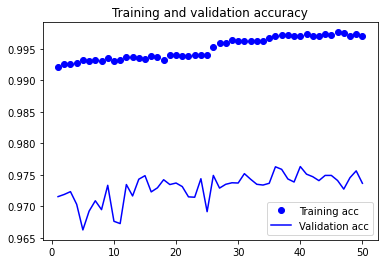

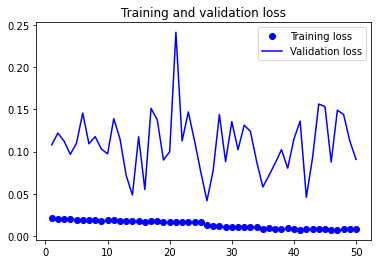

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1) 
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
model_f = load_model('/content/drive/My Drive/dataset/tenAnimals_big_no_shuffle/10_Animals_bns_f1.40-0.11.h5')

In [ ]:
model_f.evaluate_generator(test_generator)

[0.1572088748216629, 0.9759662747383118]

In [ ]:
model.save('10Ani_big_ns.h5')